In [1]:
import pandas as pd

In [2]:
PATH = '/Users/seoinjae/OneDrive - 연세대학교 (Yonsei University)/2021-2학기/2.텍스트마이닝/텀프로젝트/데이터셋/정제_20201101_20211031/감성_수치/코스피_요약_감성.csv'

In [3]:
df = pd.read_csv(PATH)

In [4]:
df.head()

,Unnamed: 0,Date,Content,score
0,0,2020-10-01,빅히트의 수요예측은 앞서 공모주 열풍을 부른 카카오게임즈에는 못 미쳤다.절반에 못 ...,0.8670
1,1,2020-10-01,낙폭 과대 및 저평가된 종목 단기 이익모멘텀의 흐름은 올 연말까지 이어질 것이라는 ...,0.9216
2,2,2020-10-01,수요예측 경쟁률 .25대 1 코스피 최대 공모가 기준 시총 4.조원 엔터 3사 합계...,0.9200
3,3,2020-10-01,사진 이미지투데이 신종 코로나바이러스 감염증 코로나파 이후 국내 증시를 주도한 바이...,0.8125
4,4,2020-10-01,증시 전문가 조정국면 박스권 장세 전망 우세 단기조정 주도주 매수 기회 2차전지 제...,0.8100


In [5]:
df = df[['Date', 'Content', 'score']]

In [6]:
df

,Date,Content,score
0,2020-10-01,빅히트의 수요예측은 앞서 공모주 열풍을 부른 카카오게임즈에는 못 미쳤다.절반에 못 ...,0.8670
1,2020-10-01,낙폭 과대 및 저평가된 종목 단기 이익모멘텀의 흐름은 올 연말까지 이어질 것이라는 ...,0.9216
2,2020-10-01,수요예측 경쟁률 .25대 1 코스피 최대 공모가 기준 시총 4.조원 엔터 3사 합계...,0.9200
3,2020-10-01,사진 이미지투데이 신종 코로나바이러스 감염증 코로나파 이후 국내 증시를 주도한 바이...,0.8125
4,2020-10-01,증시 전문가 조정국면 박스권 장세 전망 우세 단기조정 주도주 매수 기회 2차전지 제...,0.8100
...,...,...,...
33601,2021-10-31,대형 증권사들이 내년에 코스피가 역대 최고 기록을 세울 것 이라고 전망했다.올해 7...,0.5079
33602,2021-10-31,지난해 마이너스 유가 사태 이후 혹한기를 겪었던 상장지수증권 시장이 재도약을 노린다...,0.5632
33603,2021-10-31,1일부터 위드 코로나 시행 박스권 갇힌 국내 증시 영향은 경향신문 글로벌 경기 둔화...,0.8001
33604,2021-10-31,빅3 기업공개 준비 한창 경향신문 마켓컬리 닷컴 오아시스마켓 내년 국내 증시 상장을...,0.8737


In [7]:
df.describe()

,score
count,33606.000000
mean,0.826866
std,0.127041
min,0.484000
25%,0.743000
50%,0.873000
75%,0.931700
max,0.974700


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 33606 entries, 0 to 33605
Data columns (total 3 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Date     33606 non-null  object 
 1   Content  33606 non-null  object 
 2   score    33606 non-null  float64
dtypes: float64(1), object(2)
memory usage: 787.8+ KB


## 일별로 합계 구하기

In [9]:
df_group = df['score'].groupby([df['Date']]).mean()

In [10]:
df_group.tail()

Date
2021-10-27    0.859292
2021-10-28    0.817721
2021-10-29    0.850201
2021-10-30    0.869007
2021-10-31    0.815501
Name: score, dtype: float64

In [11]:
df_group.head()

Date
2020-10-01    0.804040
2020-10-02    0.842042
2020-10-03    0.788796
2020-10-04    0.848744
2020-10-05    0.820294
Name: score, dtype: float64

In [12]:
len(df_group)

396

In [13]:
SAVE_PATH = '/Users/seoinjae/OneDrive - 연세대학교 (Yonsei University)/2021-2학기/2.텍스트마이닝/텀프로젝트/데이터셋/정제_20201101_20211031/감성_수치/코스피_요약_감성_일별.csv'

In [14]:
# df_group.to_csv(SAVE_PATH)

## MinMaxScale

In [15]:
df_test = pd.read_csv(SAVE_PATH)

In [16]:
df_test

,Date,score
0,2020-10-01,0.804040
1,2020-10-02,0.842042
2,2020-10-03,0.788796
3,2020-10-04,0.848744
4,2020-10-05,0.820294
...,...,...
391,2021-10-27,0.859292
392,2021-10-28,0.817721
393,2021-10-29,0.850201
394,2021-10-30,0.869007


In [17]:
import matplotlib.pyplot as plt

In [18]:
df_plot = df_test['score'][:100]

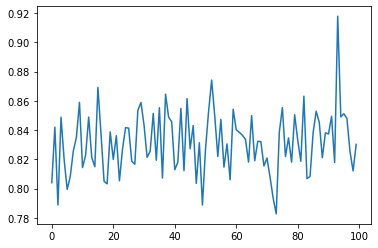

In [19]:
plt.plot(df_plot)

In [17]:
from sklearn.preprocessing import MinMaxScaler

In [18]:
scaler = MinMaxScaler()

In [22]:
type(df_plot)

pandas.core.series.Series

In [23]:
x = df_test[['score']].values

In [24]:
x

array([[0.80404   ],
       [0.84204194],
       [0.78879643],
       [0.84874444],
       [0.82029385],
       [0.79943814],
       [0.80817273],
       [0.82571064],
       [0.83498333],
       [0.85894444],
       [0.81438889],
       [0.82277436],
       [0.8488967 ],
       [0.82126636],
       [0.81494569],
       [0.86917068],
       [0.83768824],
       [0.80501154],
       [0.80327699],
       [0.83876559],
       [0.81993885],
       [0.83617353],
       [0.805324  ],
       [0.8270125 ],
       [0.84168571],
       [0.84131667],
       [0.81870508],
       [0.81666744],
       [0.853532  ],
       [0.85887358],
       [0.84351   ],
       [0.82139714],
       [0.82562455],
       [0.85135248],
       [0.8193877 ],
       [0.85525   ],
       [0.80726585],
       [0.864525  ],
       [0.84885854],
       [0.84570481],
       [0.81290804],
       [0.81806583],
       [0.85473093],
       [0.81222889],
       [0.86153684],
       [0.82720909],
       [0.84310532],
       [0.803

In [25]:
x = scaler.fit_transform(x)

In [26]:
df_scaled = pd.DataFrame(x)

In [27]:
df_scaled

,0
0,0.314026
1,0.543186
2,0.222104
3,0.583604
4,0.412040
...,...
391,0.647206
392,0.396524
393,0.592387
394,0.705792


In [28]:
df_test['Scaled Score'] = df_scaled[0]

In [29]:
df_test

,Date,score,Scaled Score
0,2020-10-01,0.804040,0.314026
1,2020-10-02,0.842042,0.543186
2,2020-10-03,0.788796,0.222104
3,2020-10-04,0.848744,0.583604
4,2020-10-05,0.820294,0.412040
...,...,...,...
391,2021-10-27,0.859292,0.647206
392,2021-10-28,0.817721,0.396524
393,2021-10-29,0.850201,0.592387
394,2021-10-30,0.869007,0.705792


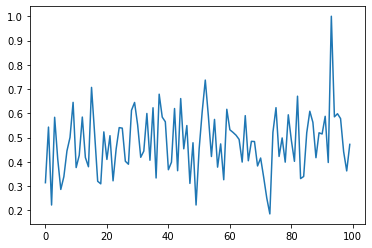

In [31]:
plt.plot(df_test['Scaled Score'][:100])

In [49]:
SAVE_PATH = '/Users/seoinjae/OneDrive - 연세대학교 (Yonsei University)/2021-2학기/2.텍스트마이닝/텀프로젝트/데이터셋/정제_20201101_20211031/감성_수치/코스피_최종.csv'

In [50]:
# df_test.to_csv(SAVE_PATH)

## 코스피 종가 데이터 MinMax Scaled

In [51]:
TEST_PATH = '/Users/seoinjae/OneDrive - 연세대학교 (Yonsei University)/2021-2학기/2.텍스트마이닝/텀프로젝트/데이터셋/코스피_데이터.xlsx'

In [52]:
df_cospi = pd.read_excel(TEST_PATH)

In [53]:
df_cospi

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,상장시가총액
0,2021/10/29,2970.68,-38.87,-1.29,3025.67,3030.17,2965.40,545834,11035682,2159375927
1,2021/10/28,3009.55,-15.94,-0.53,3023.17,3034.42,3009.55,617257,12367618,2188063339
2,2021/10/27,3025.49,-23.59,-0.77,3045.83,3049.02,3019.00,607875,10220673,2198753266
3,2021/10/26,3049.08,28.54,0.94,3039.82,3051.65,3030.53,564560,9512682,2215757780
4,2021/10/25,3020.54,14.38,0.48,3001.10,3025.27,2983.29,791796,10489294,2194484567
...,...,...,...,...,...,...,...,...,...,...
260,2020/10/12,2403.73,11.77,0.49,2404.18,2409.42,2393.74,843574,10693283,1636302269
261,2020/10/08,2391.96,5.02,0.21,2408.49,2409.01,2383.82,961726,12530442,1628133500
262,2020/10/07,2386.94,21.04,0.89,2350.82,2387.45,2347.82,737994,8971101,1624292282
263,2020/10/06,2365.90,7.90,0.34,2369.17,2378.28,2355.39,861755,11131424,1609944298


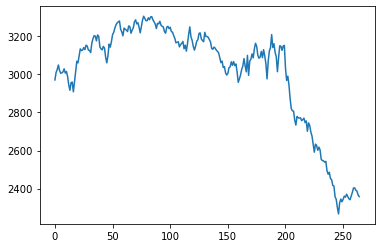

In [54]:
plt.plot(df_cospi['종가'])

In [55]:
x = df_cospi[['종가']].values

In [56]:
x

array([[2970.68],
       [3009.55],
       [3025.49],
       [3049.08],
       [3020.54],
       [3006.16],
       [3007.33],
       [3013.13],
       [3029.04],
       [3006.68],
       [3015.06],
       [2988.64],
       [2944.41],
       [2916.38],
       [2956.3 ],
       [2959.46],
       [2908.31],
       [2962.17],
       [3019.18],
       [3068.82],
       [3060.27],
       [3097.92],
       [3133.64],
       [3125.24],
       [3127.58],
       [3140.51],
       [3130.09],
       [3153.4 ],
       [3148.83],
       [3127.86],
       [3125.76],
       [3114.7 ],
       [3162.99],
       [3187.42],
       [3203.33],
       [3201.06],
       [3175.85],
       [3207.02],
       [3199.27],
       [3144.19],
       [3133.9 ],
       [3128.53],
       [3146.81],
       [3138.3 ],
       [3090.21],
       [3060.51],
       [3097.83],
       [3158.93],
       [3143.09],
       [3171.29],
       [3208.38],
       [3220.62],
       [3243.19],
       [3260.42],
       [3270.36],
       [32

In [57]:
x = scaler.fit_transform(x)

In [58]:
df_scaled_cospi = pd.DataFrame(x)

In [59]:
df_scaled_cospi

,0
0,0.677735
1,0.715180
2,0.730536
3,0.753261
4,0.725767
...,...
260,0.131572
261,0.120234
262,0.115398
263,0.095129


In [60]:
df_cospi['Scaled Score'] = df_scaled_cospi[0]

In [79]:
df_cospi.head()

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,상장시가총액,Scaled Score,Scaled volume Score
0,2021/10/29,2970.68,-38.87,-1.29,3025.67,3030.17,2965.40,545834,11035682,2159375927,0.677735,0.012243
1,2021/10/28,3009.55,-15.94,-0.53,3023.17,3034.42,3009.55,617257,12367618,2188063339,0.715180,0.036490
2,2021/10/27,3025.49,-23.59,-0.77,3045.83,3049.02,3019.00,607875,10220673,2198753266,0.730536,0.033305
3,2021/10/26,3049.08,28.54,0.94,3039.82,3051.65,3030.53,564560,9512682,2215757780,0.753261,0.018600
4,2021/10/25,3020.54,14.38,0.48,3001.10,3025.27,2983.29,791796,10489294,2194484567,0.725767,0.095741


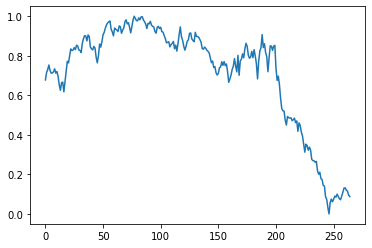

In [62]:
plt.plot(df_cospi['Scaled Score'])

## 거래량 정규화

In [67]:
y = df_cospi[['거래량']].values

In [68]:
y = scaler.fit_transform(y)

In [69]:
df_scaled_volume = pd.DataFrame(y)

In [70]:
df_cospi['Scaled volume Score'] = df_scaled_volume[0]

In [71]:
df_cospi

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,상장시가총액,Scaled Score,Scaled volume Score
0,2021/10/29,2970.68,-38.87,-1.29,3025.67,3030.17,2965.40,545834,11035682,2159375927,0.677735,0.012243
1,2021/10/28,3009.55,-15.94,-0.53,3023.17,3034.42,3009.55,617257,12367618,2188063339,0.715180,0.036490
2,2021/10/27,3025.49,-23.59,-0.77,3045.83,3049.02,3019.00,607875,10220673,2198753266,0.730536,0.033305
3,2021/10/26,3049.08,28.54,0.94,3039.82,3051.65,3030.53,564560,9512682,2215757780,0.753261,0.018600
4,2021/10/25,3020.54,14.38,0.48,3001.10,3025.27,2983.29,791796,10489294,2194484567,0.725767,0.095741
...,...,...,...,...,...,...,...,...,...,...,...,...
260,2020/10/12,2403.73,11.77,0.49,2404.18,2409.42,2393.74,843574,10693283,1636302269,0.131572,0.113318
261,2020/10/08,2391.96,5.02,0.21,2408.49,2409.01,2383.82,961726,12530442,1628133500,0.120234,0.153428
262,2020/10/07,2386.94,21.04,0.89,2350.82,2387.45,2347.82,737994,8971101,1624292282,0.115398,0.077477
263,2020/10/06,2365.90,7.90,0.34,2369.17,2378.28,2355.39,861755,11131424,1609944298,0.095129,0.119490


In [74]:
df_cospi_final = df_cospi[['일자','Scaled Score','Scaled volume Score']]

In [75]:
df_cospi_final

,일자,Scaled Score,Scaled volume Score
0,2021/10/29,0.677735,0.012243
1,2021/10/28,0.715180,0.036490
2,2021/10/27,0.730536,0.033305
3,2021/10/26,0.753261,0.018600
4,2021/10/25,0.725767,0.095741
...,...,...,...
260,2020/10/12,0.131572,0.113318
261,2020/10/08,0.120234,0.153428
262,2020/10/07,0.115398,0.077477
263,2020/10/06,0.095129,0.119490


In [76]:
SAVE_PATH = '/Users/seoinjae/OneDrive - 연세대학교 (Yonsei University)/2021-2학기/2.텍스트마이닝/텀프로젝트/데이터셋/코스피_거래량_최종.csv'

In [77]:
df_cospi_final.to_csv(SAVE_PATH)

## label 만들기

In [83]:
df_cospi[:100]

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,상장시가총액,Scaled Score,Scaled volume Score
0,2021/10/29,2970.68,-38.87,-1.29,3025.67,3030.17,2965.40,545834,11035682,2159375927,0.677735,0.012243
1,2021/10/28,3009.55,-15.94,-0.53,3023.17,3034.42,3009.55,617257,12367618,2188063339,0.715180,0.036490
2,2021/10/27,3025.49,-23.59,-0.77,3045.83,3049.02,3019.00,607875,10220673,2198753266,0.730536,0.033305
3,2021/10/26,3049.08,28.54,0.94,3039.82,3051.65,3030.53,564560,9512682,2215757780,0.753261,0.018600
4,2021/10/25,3020.54,14.38,0.48,3001.10,3025.27,2983.29,791796,10489294,2194484567,0.725767,0.095741
...,...,...,...,...,...,...,...,...,...,...,...,...
95,2021/06/10,3224.64,8.46,0.26,3216.94,3235.39,3210.31,1896766,19170540,2255706784,0.922384,0.470849
96,2021/06/09,3216.18,-31.65,-0.97,3245.08,3246.49,3216.18,1964923,17164710,2250239308,0.914234,0.493987
97,2021/06/08,3247.83,-4.29,-0.13,3251.83,3264.67,3242.56,1951319,19352174,2271737874,0.944724,0.489369
98,2021/06/07,3252.12,12.04,0.37,3244.59,3264.41,3233.40,1733348,19023222,2274803756,0.948857,0.415373


In [85]:
df_up_down = df_cospi[['등락률']]

In [86]:
df_up_down.head()

,등락률
0,-1.29
1,-0.53
2,-0.77
3,0.94
4,0.48


In [95]:
for i, j in df_up_down.iterrows():
    if df_up_down.at[i, '등락률'] < 0 :
        df_up_down.at[i, '라벨'] = 0
    else:
        df_up_down.at[i, '라벨'] = 1

/Users/seoinjae/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1596: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[key] = _infer_fill_value(value)
/Users/seoinjae/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:1601: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self._setitem_with_indexer(new_indexer, value)
/Users/seoinjae/opt/anaconda3/lib/python3.8/site-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentati

In [96]:
df_up_down

,등락률,라벨
0,-1.29,0.0
1,-0.53,0.0
2,-0.77,0.0
3,0.94,1.0
4,0.48,1.0
...,...,...
260,0.49,1.0
261,0.21,1.0
262,0.89,1.0
263,0.34,1.0


In [97]:
df_label = df_up_down[['라벨']]
df_label.head()

,라벨
0,0.0
1,0.0
2,0.0
3,1.0
4,1.0


In [101]:
df_cospi['label'] = df_label

In [102]:
df_cospi

,일자,종가,대비,등락률,시가,고가,저가,거래량,거래대금,상장시가총액,Scaled Score,Scaled volume Score,label
0,2021/10/29,2970.68,-38.87,-1.29,3025.67,3030.17,2965.40,545834,11035682,2159375927,0.677735,0.012243,0.0
1,2021/10/28,3009.55,-15.94,-0.53,3023.17,3034.42,3009.55,617257,12367618,2188063339,0.715180,0.036490,0.0
2,2021/10/27,3025.49,-23.59,-0.77,3045.83,3049.02,3019.00,607875,10220673,2198753266,0.730536,0.033305,0.0
3,2021/10/26,3049.08,28.54,0.94,3039.82,3051.65,3030.53,564560,9512682,2215757780,0.753261,0.018600,1.0
4,2021/10/25,3020.54,14.38,0.48,3001.10,3025.27,2983.29,791796,10489294,2194484567,0.725767,0.095741,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
260,2020/10/12,2403.73,11.77,0.49,2404.18,2409.42,2393.74,843574,10693283,1636302269,0.131572,0.113318,1.0
261,2020/10/08,2391.96,5.02,0.21,2408.49,2409.01,2383.82,961726,12530442,1628133500,0.120234,0.153428,1.0
262,2020/10/07,2386.94,21.04,0.89,2350.82,2387.45,2347.82,737994,8971101,1624292282,0.115398,0.077477,1.0
263,2020/10/06,2365.90,7.90,0.34,2369.17,2378.28,2355.39,861755,11131424,1609944298,0.095129,0.119490,1.0


In [103]:
SAVE_PATH = '/Users/seoinjae/OneDrive - 연세대학교 (Yonsei University)/2021-2학기/2.텍스트마이닝/텀프로젝트/데이터셋/코스피_거래량_라벨.csv'

In [104]:
df_cospi.to_csv(SAVE_PATH)

## 주식 종가 데이터 MinMax Scaled

In [2]:
PATH = 'C:/Users/ANDlab3/OneDrive - 연세대학교 (Yonsei University)/2021-2학기/2.텍스트마이닝/텀프로젝트/데이터셋/주식_요약_감성_통합데이터.xlsx'

In [4]:
df_stock = pd.read_excel(PATH)

In [5]:
df_stock

,Date,Content,score1
0,2020-11-01,해외에서 장기간 체류했던 사람이라면 누구나 년대 이후 고 이건희 회장의 이끈 삼성이...,0.9606
1,2020-11-01,이미지 원본보기 뉴스엔 계층 이동의 사다리가 된 주식 우리나라 주식시장은 공정할까 ...,0.5234
2,2020-11-01,이에 제작진은 부동산 가상화폐 로또 등 다 영한 방식의 돈 열풍 속에서 사다리 위에...,0.9368
3,2020-11-01,입시비리 사모펀드 의혹 정경심 교수 결심 공판도 김경수 경남도지사 자료사진 댓글을 ...,0.9534
4,2020-11-01,미국 월가의 살아있는 전설 로 불리는 피터 린치는 년 뉴욕 맨해튼 지역에 살던 인...,0.8589
...,...,...,...
56615,2021-10-31,경향신문 존속 텔레콤은 통신 집중 신설 스퀘어는 투자 전문회사로 출발 텔레콤이 1일...,0.4986
56616,2021-10-31,신한금융은 인수 대상으로 대형 손보사를 찾기 어렵자 중소 손보사를 선택한 것으로 알...,0.8808
56617,2021-10-31,포퓰리즘 논란 부르는 국면전환 카드 전 국민에 최하 30만 50만원 추가 지급 ...,0.9029
56618,2021-10-31,11월을 맞는 국내 증시의 표정이 그리 밝지 않다.지난달 29일 코스피는 선을 코스...,0.8844


In [6]:
df_stock_group = df_stock['score1'].groupby([df_stock['Date']]).mean()

In [7]:
df_stock_group

Date
2020-11-01    0.821315
2020-11-02    0.808752
2020-11-03    0.814852
2020-11-04    0.817948
2020-11-05    0.830193
                ...   
2021-10-27    0.822448
2021-10-28    0.827796
2021-10-29    0.818437
2021-10-30    0.846225
2021-10-31    0.829788
Name: score1, Length: 365, dtype: float64

In [8]:
len(df_stock_group)

365

In [9]:
SAVE_PATH = 'C:/Users/ANDlab3/OneDrive - 연세대학교 (Yonsei University)/2021-2학기/2.텍스트마이닝/텀프로젝트/데이터셋/주식_일별데이터.xlsx'

In [10]:
# df_stock_group.to_excel(SAVE_PATH)

In [14]:
df_stock_group = pd.read_excel(SAVE_PATH)

In [15]:
df_stock_group.head()

,Date,score1
0,2020-11-01,0.821315
1,2020-11-02,0.808752
2,2020-11-03,0.814852
3,2020-11-04,0.817948
4,2020-11-05,0.830193


In [19]:
z = df_stock_group[['score1']].values
z = scaler.fit_transform(z)
df_scaled_senti = pd.DataFrame(z)

In [23]:
df_scaled_senti

,0
0,0.427004
1,0.292391
2,0.357752
3,0.390928
4,0.522130
...,...
360,0.439145
361,0.496448
362,0.396164
363,0.693919


In [24]:
df_stock_group['Scaled Senti stock Score'] = df_scaled_senti

In [25]:
df_stock_group

,Date,score1,Scaled Senti stock Score
0,2020-11-01,0.821315,0.427004
1,2020-11-02,0.808752,0.292391
2,2020-11-03,0.814852,0.357752
3,2020-11-04,0.817948,0.390928
4,2020-11-05,0.830193,0.522130
...,...,...,...
360,2021-10-27,0.822448,0.439145
361,2021-10-28,0.827796,0.496448
362,2021-10-29,0.818437,0.396164
363,2021-10-30,0.846225,0.693919


In [26]:
SAVE_PATH = 'C:/Users/ANDlab3/OneDrive - 연세대학교 (Yonsei University)/2021-2학기/2.텍스트마이닝/텀프로젝트/데이터셋/주식_감성데이터.xlsx'

In [27]:
df_stock_group.to_excel(SAVE_PATH)